# Explanatory Data Analysis for Data Roles

## Goal:

1. Analyze high-paying roles and in-demand skills within the data science industry using a real-world job postings dataset.

2. Utilize Python for data exploration and visualization to uncover key insights.

3. Provide actionable findings to assist job-seekers in identifying the most valuable opportunities and skillsets.

## Questions to Answer:

1. What are the most in-demand skills for the top three most common data roles?

2. How are skill demands evolving over time for Data Analyst positions?

3. What is the relationship between pay and skills for Data Analysts?

4. Which skill offers the best return on investment for Data Analysts—high in both demand and salary?



### Exploring Number of Data Roles by Job Title

In [3]:
#Importing Libraries 
import ast
import pandas as pd
import seaborn as sns
from datasets import load_dataset 
import matplotlib.pyplot as plt

#Load Data 
dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

#Data Cleaning
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(lambda x: ast.literal_eval(x)  if pd.notna(x) else x)

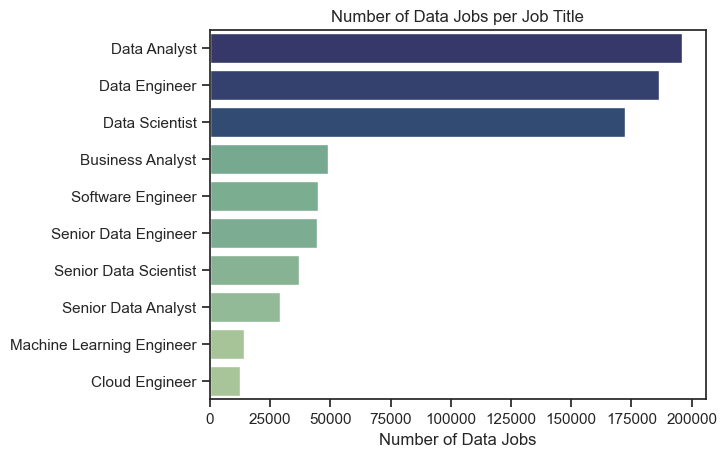

In [5]:
df_plot = df['job_title_short'].value_counts().to_frame()

sns.set_theme(style = 'ticks')
sns.barplot(data = df_plot, x = 'count', y = 'job_title_short', hue = 'count', palette = 'crest', legend = False)
plt.title("Number of Data Jobs per Job Title")
plt.xlabel("Number of Data Jobs")
plt.ylabel("")
plt.show()

### Exploring Number of Data Job by Country

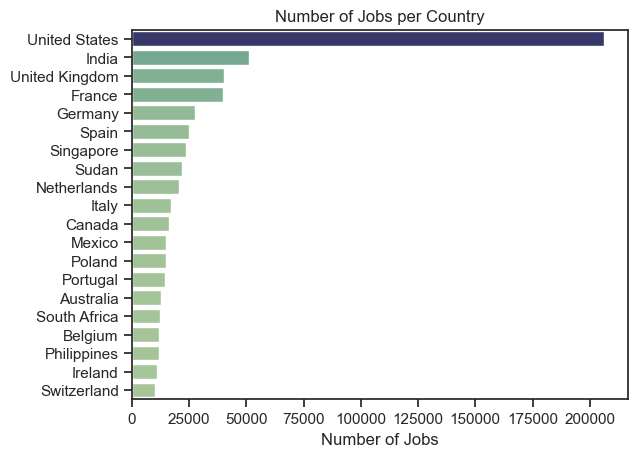

In [10]:
#top 20 countries with most Jobs postings
df_plot = df['job_country'].value_counts().to_frame().head(20)

sns.set_theme(style = 'ticks')
sns.barplot(data = df_plot, x = 'count',  y = 'job_country', hue = 'count', palette = 'crest', legend = False)
plt.title("Number of Jobs per Country")
plt.xlabel("Number of Jobs")
plt.ylabel("")
plt.show()



### Exploring Number of Data Jobs by Company

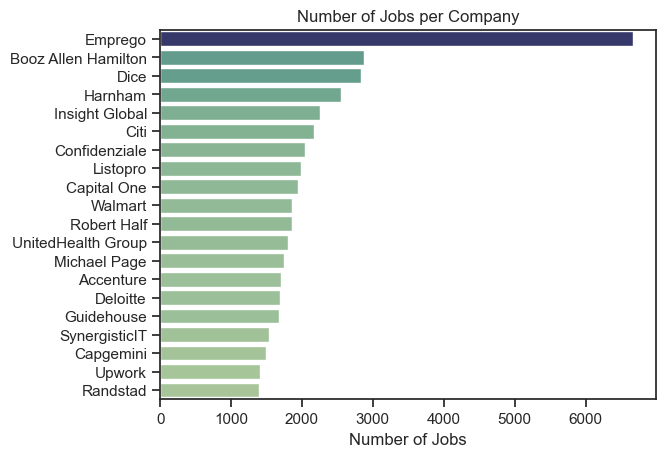

In [15]:
df_plot = df['company_name'].value_counts().to_frame().head(20)

sns.set_theme(style = 'ticks')
sns.barplot(data = df_plot, x = 'count', y = 'company_name', hue = 'count', palette = 'crest', legend = False)
plt.title("Number of Jobs per Company")
plt.xlabel("Number of Jobs")
plt.ylabel("")
plt.show()

### Distribution of Job Features in Listings

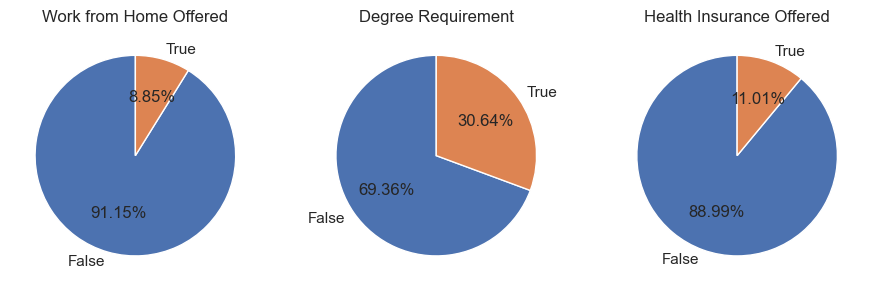

In [17]:
dict_column = {
    'job_work_from_home': 'Work from Home Offered',
    'job_no_degree_mention': 'Degree Requirement',
    'job_health_insurance': 'Health Insurance Offered'
}

fig, ax = plt.subplots(1, 3, figsize = (11, 3.5))

for i, (key, value) in enumerate(dict_column.items()):
    ax[i].pie(df[key].value_counts(), labels = ['False', 'True'], autopct = "%1.2f%%", startangle = 90)
    ax[i].set_title(value)

plt.show()

### Explanatory Data Analysis for US Data Roles